<p style="text-align: center;"> <font size=16>Supermarket Customer</font></p>

----

### Business Understanding
Mengutip dari web wikipedia, supermarket merupakan sebuah usaha dalam bentuk toko yang menganut sistem swalayan dalam pengoperasiannya dimana dalam pengelolaannya dikelola oleh pribadi maupun franchise. Pada supermarket menawarkan berbagai macam produk seperti makanan dalam bentuk bahan maupun olahan, minuman, dan serta berbagai produk rumah tangga seperti alat dapur dan lain sebagainya. Untuk ukuran luas dari supermarket sendiri berukuran sedang dimana untuk ukurannya lebih besar jika dibandingkan dengan minimarket dan lebih kecil dari sebuah hypermart. Dalam pengoperasiannya, supermarket tidak luput dari berbagai macam strategi marketing yang bertujuan untuk menarik minat calon pembeli untuk bertransaksi atau memikat pelanggan agar membeli lebih banyak produk yang ditawarkan oleh pihak supermarket. Sebagai contoh strategi marketing yang dapat dilakukan oleh pihak marketing adalah pemberian promo ekstra diskon untuk member tertentu, tebus murah, dan pembagian flyer promo secara perorangan. 
### Business Task
Pada capstone project kali ini saya mengasumsikan client merupakah seorang pemilik supermarket pribadi yang ingin mengetahui insight insight yang dapat diambil dari kegiatan-kegiatan marketing yang telah dilakukan oleh tim marketing dan juga minat beli produk dari pelanggan sehingga didapatkan kebijakan marketing apa yang akan dilakukan selanjutnya guna untuk mengoptimalkan sumber daya pada tim marketing, sales, dan stok pergudangan.
### Business Problem
Dengan merujuk pada Business Task yang telah dijelaskan sebelumnya, Business Problem dapat dibagi sebagai berikut.
-	Mengevaluasi tingkat keberhasilan kampanye pemasaran yang telah dilaksanakan
-	Mengidentifikasi produk yang memiliki minat jual terendah hingga tertinggi sebagai bahan pertimbangan pemasaran selanjutnya
-	Mengidentifikasi profil pelanggan yang berbelanja
### Stake Holder
Pada rumusan Business Problem yang telah dijelaskan, pihak yang memiliki kepentingan dalam perihal ini adalah:
1.	Manajemen Supermarket
2.	Marketing
3.	Sales


## Data Ingestion

In [2]:
# Importing module that might be needed in data analyzing

# Data Manipulation
import pandas as pd
import numpy as np

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading source file

df_market = pd.read_csv(r'E:\Purwadhika School\Capstone Project\Modul 02 - Data Analysis\Supermarket_Customers.csv', sep='\t')
df_market.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Cleaning

### *Duplicated value*

In [5]:
# Checkpoint 1
df_market_temp = df_market

In [6]:
# Checking all data
df_market_temp.duplicated().sum()

# There's no duplicated data inside dataframe

0

### *Value standardization*

Reordering accepted campaign variable to ease dataframe reading

In [7]:
# Show all column names
df_market_temp.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
# Reordering columns to ease dataframe reading
new_order =['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
            'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

df_market_temp=df_market_temp.reindex(columns=new_order)
df_market_temp

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,1,0,0,0,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,0,0,1,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


- Casting Dt_Customer into datetime

In [9]:
# Casting Dt_Customer variable into datetime so Dt_Customer can be analized based on time
df_market_temp['Dt_Customer'] = pd.to_datetime(df_market_temp['Dt_Customer'], format='mixed')

In [10]:
df_market_temp['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [11]:
df_market=df_market_temp

### *Missing value*

In [12]:
# Checkpoint 2
df_market_temp=df_market

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


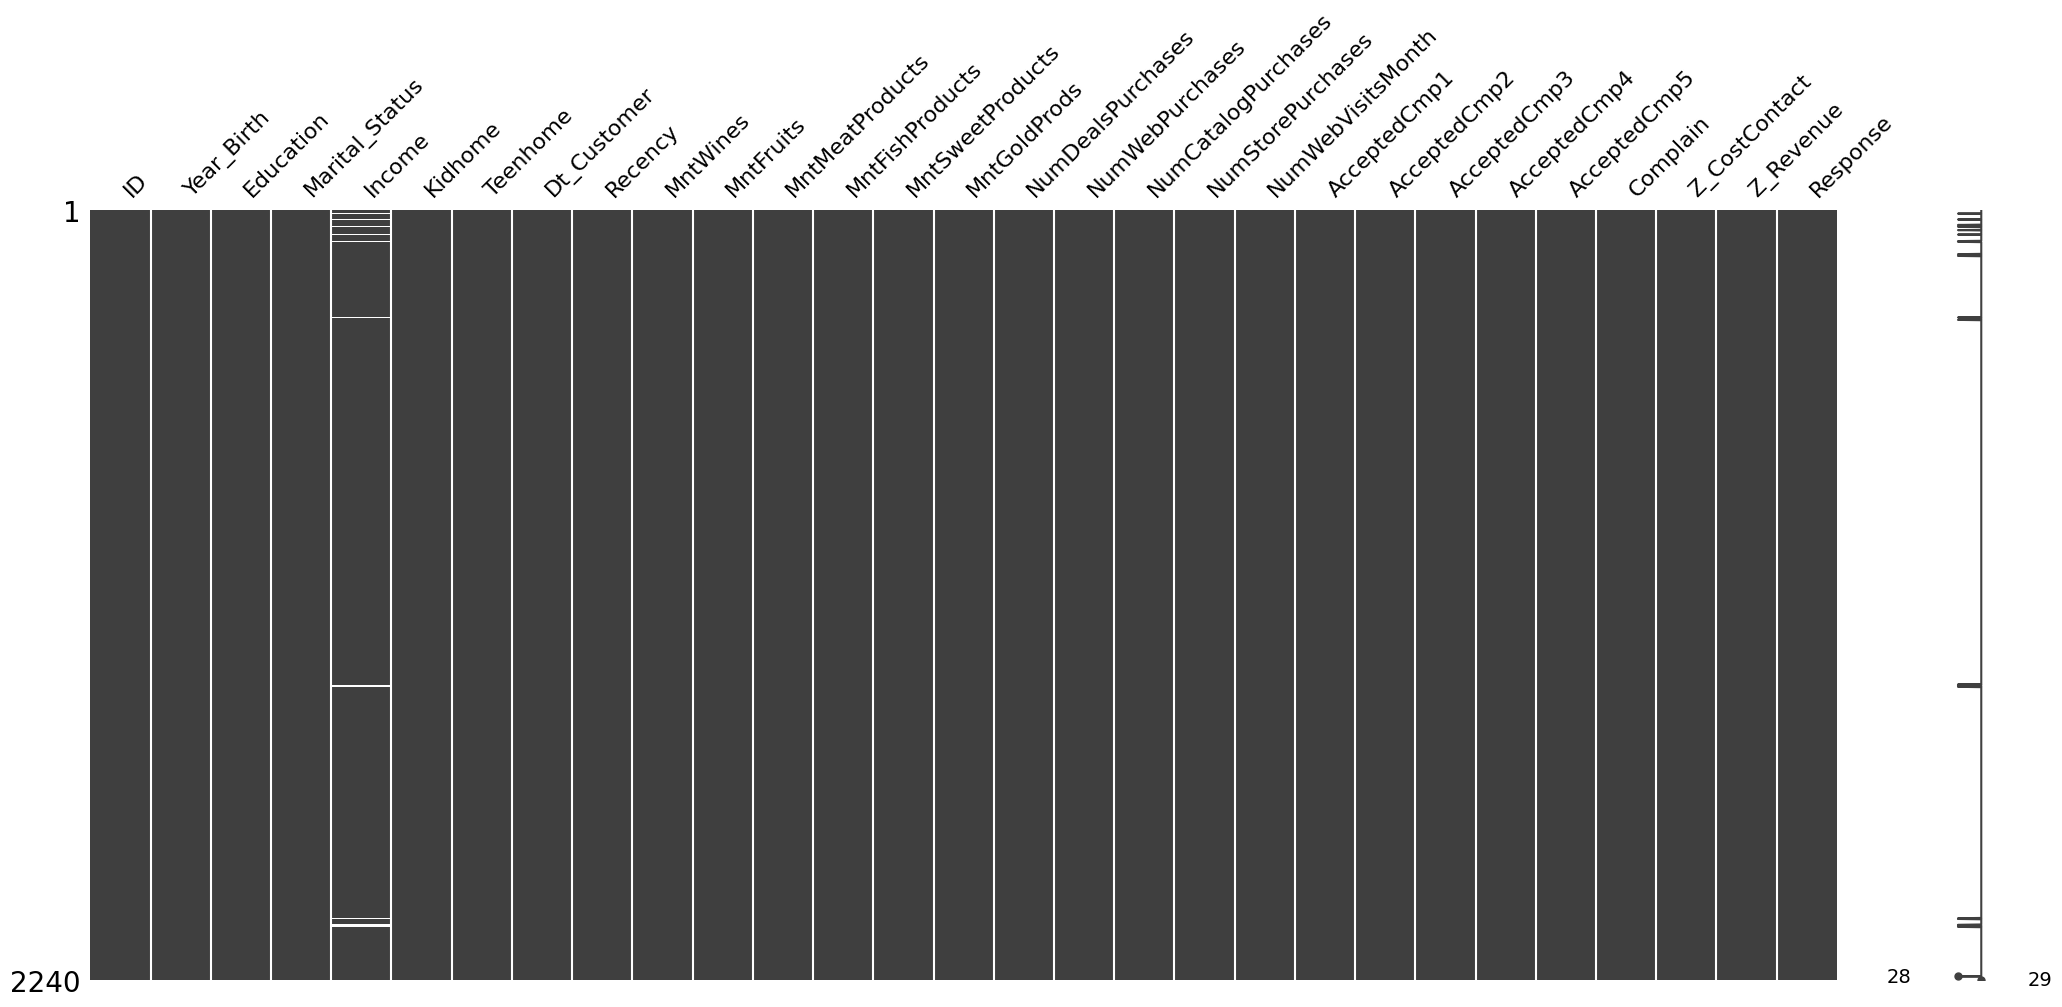

In [13]:
# Identifying missing value in each variable
print(df_market_temp.isna().sum())

import missingno

missingno.matrix(df_market_temp);

In [14]:
# Checking missing value percentage per variable
(df_market_temp.isna().sum() / len(df_market_temp) * 100).round(2)

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               0.00
dtype: float64

In [15]:
# Checking missing value percentage in dataframe
(df_market_temp.isna().any(axis=1).sum() / len(df_market_temp) * 100).round(2)

1.07

In [16]:
# Missing value pattern identification
df_market_temp[df_market_temp['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,...,6,0,0,0,0,0,0,3,11,0


In [17]:
# Assuming respondent not made any income, filling missing value with 0
df_market_temp['Income'].fillna(0, inplace=True)

In [18]:
# Checking other variable that still have any missing value
(df_market_temp.isna().sum() / len(df_market_temp) * 100).round(2)

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

In [19]:
df_market=df_market_temp

### *Data Anomalies*

In [20]:
# Checkpoint 3
df_market_temp = df_market

In [21]:
cat_feature = df_market_temp.select_dtypes('O')

pd.DataFrame({
    'column': cat_feature.columns,
    'nunique': [cat_feature[col].nunique() for col in cat_feature.columns],
    'unique': [cat_feature[col].unique() for col in cat_feature.columns]
})

,column,nunique,unique
0,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
1,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, A..."


In [22]:
# Value identification in each variable
for item in df_market_temp.columns:
    print(item)
    print(df_market_temp[item].unique())
    print()

ID
[5524 2174 4141 ... 7270 8235 9405]

Year_Birth
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]

Education
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Marital_Status
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Income
[58138. 46344. 71613. ... 56981. 69245. 52869.]

Kidhome
[0 1 2]

Teenhome
[0 1 2]

Dt_Customer
<DatetimeArray>
['2012-04-09 00:00:00', '2014-08-03 00:00:00', '2013-08-21 00:00:00',
 '2014-10-02 00:00:00', '2014-01-19 00:00:00', '2013-09-09 00:00:00',
 '2012-11-13 00:00:00', '2013-08-05 00:00:00', '2013-06-06 00:00:00',
 '2014-03-13 00:00:00',
 ...
 '2014-03-27 00:00:00', '2012-12-15 00:00:00', '2012-09-17 00:00:00',
 '2013-02-06 00:00:00', '2012-12-21 00:00:00', '2013-01-11 00:00:00'

Based on "https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=61748&CVD=61748&CLV=0&MLV=1&D=1",
there are 5 classification of legal marital status such as:
- Single
- Married
- Separated
- Divorced
- Widowed

In Marital_status variable, there's unique value such as `Alone`, `Absurd`, `YOLO`, `Together`

In [23]:
# Searching for any pattern for 'Alone' value
df_market_temp[df_market_temp['Marital_Status']=='Alone']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
131,433,1958,Master,Alone,61331.0,1,1,2013-10-03,42,534,...,8,0,0,0,0,0,0,3,11,0
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,...,5,0,0,1,0,0,0,3,11,1
153,92,1988,Graduation,Alone,34176.0,1,0,2014-12-05,12,5,...,6,0,0,0,0,0,0,3,11,0


In [24]:
# Assuming alone means single, renaming 'Alone' into Single
df_market_temp['Marital_Status'].replace('Alone', 'Single', inplace=True)

In [25]:
# Searching for any pattern for 'Together' value
df_market_temp[df_market_temp['Marital_Status']=='Together']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,0,0,1,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,4749,1968,Graduation,Together,58554.0,1,1,2012-09-26,55,368,...,7,0,0,0,0,0,0,3,11,0
2228,8720,1978,2n Cycle,Together,0.0,0,0,2012-12-08,53,32,...,0,0,0,0,1,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,...,6,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,1,0,0,0,0,0,3,11,0


In [26]:
# Assuming Together means married, renaming 'Together' into Married
df_market_temp['Marital_Status'].replace('Together', 'Married', inplace=True)

In [27]:
# Searching for any pattern for 'Absurd' value
df_market_temp[df_market_temp['Marital_Status']=='Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,1,1,0,0,0,1,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-10-01,48,240,...,2,0,0,0,0,0,0,3,11,0


In [28]:
# On 'Absurd', there is no pattern that represent the data, so we could drop the data with 'Absurd' value
df_market_temp.drop(index=df_market_temp[df_market_temp['Marital_Status']=='Absurd'].index, inplace=True)

In [29]:
# Searching for any pattern for 'YOLO' value
df_market_temp[df_market_temp['Marital_Status']=='YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,1


In [30]:
df_market_temp.loc[(df_market_temp['Year_Birth']==1973)&
                    (df_market_temp['Education']=='PhD')&
                    (df_market_temp['Income']==48432.0)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
1595,1041,1973,PhD,Single,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,1
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,1


In [31]:
# On 'YOLO', the pattern of data is exacly same as user with ID 1041.
# So the best way to handle this anomaly is dropping the data with 'YOLO' Marital Status
df_market_temp.drop(index=df_market_temp[df_market_temp['Marital_Status']=='YOLO'].index, inplace=True)

In [32]:
df_market_temp['Marital_Status'].unique()

# Done standardizing marital status value

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

In the dataframe, there is 2 variable that only got 1 value. That variable are `Z-CostContact` and `Z-Revenue` with value `3` and `11`.

Because there is no information about variables, assuming those as anomalies that need to be dropped.

In [33]:
df_market_temp.drop(columns=['Z_CostContact','Z_Revenue'], inplace=True)

In [34]:
df_market_temp

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-10-06,56,406,...,2,5,7,1,0,0,0,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,0,0,1,0,0,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In Education varible, there value that named `2n Cycle`.

Based many reference such as "https://www.ingegneria.unipd.it/en/courses/second-cycle-degrees", 2n Cycle education level is equivalent to Master Degree

In [35]:
# Replacing 2n Cycle into Master
df_market_temp['Education'].replace('2n Cycle', 'Master', inplace=True)

In [36]:
df_market_temp['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

From this dataframe, we can estimate customer age from `Year_Birth` and `Dt_Customer`

In [37]:
df_market_temp['Year'] = df_market_temp['Dt_Customer'].dt.strftime('%Y').astype('int64')
df_market_temp

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Year
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,0,1,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,0,0,2014
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,2013
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,0,0,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,0,2013
2236,4001,1946,PhD,Married,64014.0,2,1,2014-10-06,56,406,...,5,7,1,0,0,0,0,0,0,2014
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,13,6,0,0,0,1,0,0,0,2014
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,10,3,0,0,0,0,0,0,0,2014


In [38]:
# Checking if there any anomalies in Year
df_market_temp['Year'].describe()

count    2236.000000
mean     2013.029070
std         0.683821
min      2012.000000
25%      2013.000000
50%      2013.000000
75%      2013.000000
max      2014.000000
Name: Year, dtype: float64

In [39]:
max_year = df_market_temp['Year'].describe().loc['max']
max_year

2014.0

In [40]:
df_market_temp['Age_Estimation'] = max_year - df_market_temp['Year_Birth']
df_market_temp

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Year,Age_Estimation
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,1,2012,57.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,0,2014,60.0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,2013,49.0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,0,2014,30.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,2014,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,0,2013,47.0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-10-06,56,406,...,7,1,0,0,0,0,0,0,2014,68.0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,0,0,1,0,0,0,2014,33.0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,0,2014,58.0


In [41]:
df_market=df_market_temp

### *Outliers*

In [42]:
# Check outlier

df_market_temp.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Year,Age_Estimation
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236,2236.000000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,5591.551878,1968.796512,51671.875671,0.444991,0.506261,2013-07-12 02:06:13.524150272,49.147138,303.873435,26.271020,166.924419,...,5.317531,0.063953,0.013417,0.072898,0.074687,0.072451,0.009392,0.148479,2013.029070,45.203488
min,0.000000,1893.000000,0.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,18.000000
25%,2828.250000,1959.000000,34686.250000,0.000000,0.000000,2013-01-20 00:00:00,24.000000,23.000000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,37.000000
50%,5458.500000,1970.000000,51075.000000,0.000000,0.000000,2013-07-11 00:00:00,49.000000,173.000000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,44.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,505.000000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,55.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,121.000000
std,3245.240106,11.980604,25623.768388,0.538551,0.544615,NaN,28.954880,336.876776,39.761356,225.778550,...,2.424756,0.244725,0.115077,0.260027,0.262944,0.259291,0.096477,0.355654,0.683821,11.980604


In Age_Estimation there's value that show that there is customer whose age exceed over 100 which is maybe possible, but not so many. So lets put it on outlier. For other variable, the value seems ok

In [43]:
q1 = df_market_temp['Age_Estimation'].quantile(.25)
q3 = df_market_temp['Age_Estimation'].quantile(.75)
iqr = q3-q1

upper = q3+1.5*iqr
lower = q1-1.5*iqr

print("Outlier Percentage", round(len(df_market_temp[(df_market_temp['Age_Estimation'] > upper) | (df_market_temp['Age_Estimation'] < lower)]) / len(df_market_temp),10))
print(upper)
print(lower)

Outlier Percentage 0.0013416816
82.0
10.0


In [44]:
df_market_temp[(df_market_temp['Age_Estimation'] > upper) | (df_market_temp['Age_Estimation'] < lower)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Year,Age_Estimation
192,7829,1900,Master,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,0,2013,114.0
239,11004,1893,Master,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,0,2014,121.0
339,1150,1899,PhD,Married,83532.0,0,0,2013-09-26,36,755,...,1,0,0,0,0,1,0,0,2013,115.0


In [45]:
# Total outlier of data are not many, so its ok to drop it
df_market_temp = df_market_temp[
    (df_market_temp['Age_Estimation'] <= upper) |
    (df_market_temp['Age_Estimation'] >= lower)
    ]

In [46]:
# Final result of cleaning
df_market = df_market_temp
df_marketCL = df_market

## Data Analization

In [47]:
df_marketCL

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Year,Age_Estimation
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,1,2012,57.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,0,2014,60.0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,2013,49.0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,0,2014,30.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,2014,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,0,2013,47.0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-10-06,56,406,...,7,1,0,0,0,0,0,0,2014,68.0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,0,0,1,0,0,0,2014,33.0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,0,2014,58.0


### *Campaign Success Rate*

In [103]:
count_camp = df_marketCL.iloc[:, 20:25].apply(pd.Series.value_counts)
count_camp.reset_index(inplace=True)

In [104]:
count_camp = count_camp.melt(id_vars=['index'], 
                            value_vars=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'], 
                            var_name='campaign', 
                            value_name='total')

In [105]:
count_camp.rename(columns={"index":"accepted"}, inplace=True)

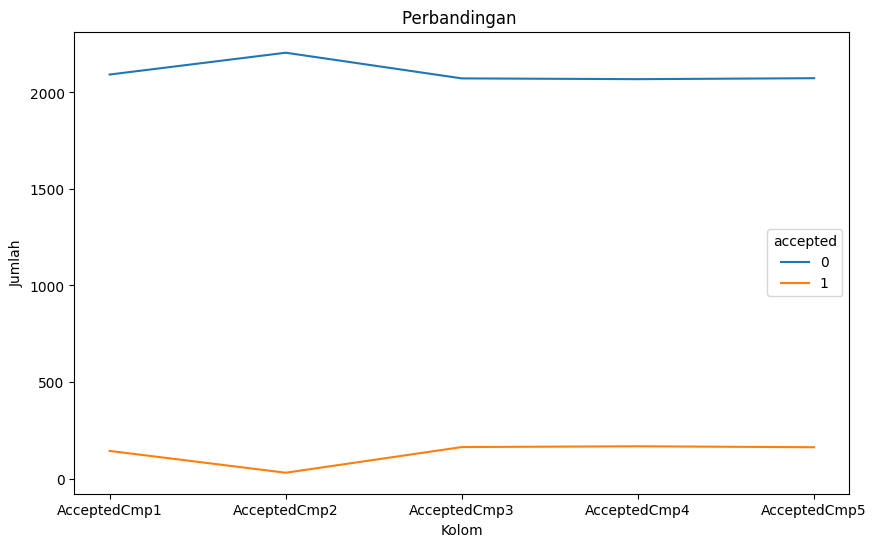

In [106]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(data=count_camp, x='campaign', y='total', hue='accepted')
plt.xlabel('Kolom')
plt.ylabel('Jumlah')
plt.title('Perbandingan ')
plt.show()


In [107]:
count_camp = df_marketCL.iloc[:, 20:25].apply(pd.Series.value_counts)

### *Customer Segmentation*

In [118]:
df_marketCL.groupby('Education')[['ID']].count()

,ID
Education,
Basic,54
Graduation,1126
Master,572
PhD,484


In [121]:
df_marketCL.groupby('Education')[['MntWines','MntFruits',
                                  'MntMeatProducts','MntFishProducts',
                                  'MntSweetProducts','MntGoldProds']].sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
Basic,391,600,618,921,654,1233
Graduation,319900,34581,202159,48418,35290,57062
Master,163229,13823,88625,21317,14788,24203
PhD,195941,9738,81841,12982,9822,15619


In [127]:
df_marketCL.iloc[:, 9:15].sum()

MntWines            679461
MntFruits            58742
MntMeatProducts     373243
MntFishProducts      83638
MntSweetProducts     60554
MntGoldProds         98117
dtype: int64

### *Product*

In [119]:
df_marketCL.iloc[:, 9:15].columns

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')